In [1]:
%matplotlib widget

import sqlalchemy
import pandas as pd
import ipywidgets as widgets
import numpy as np
import os
from matplotlib import pyplot as plt

host = os.environ["PG_HOST"]
db = os.environ["PG_DATABASE"]
user = os.environ["PG_USER"]
pw = os.environ["PG_PASSWORD"]

engine = f"postgresql+psycopg2://{user}:{pw}@{host}:5432/{db}"

realtime = pd.read_sql("SELECT format('%%s,%%s', lat, lon) as lat_lon, * FROM realtime", engine)
timeline = pd.read_sql("select format('%%s,%%s', lat, lon) as lat_lon, * from timeline", engine)


def show_realtime(lat_lon):
    df = realtime[realtime['lat_lon'] == lat_lon]
    df = df.loc[:, df.columns != 'lat_lon'].transpose()
    return df
def show_timeline(lat_lon):
    df = timeline[timeline['lat_lon'] == lat_lon]
    df = df.loc[:, df.columns != 'lat_lon']
    df = df.sort_values(by=['startTime'])
    
    return df.plot(x='startTime', rot=90)
    # plt.pause(1e-10)
 

interactive(children=(Dropdown(description='lat_lon', options=('25.8600,-97.4200', '25.9000,-97.5200'), value=…

interactive(children=(Dropdown(description='lat_lon', options=('25.8600,-97.4200', '25.9000,-97.5200'), value=…

<function __main__.show_timeline(lat_lon)>

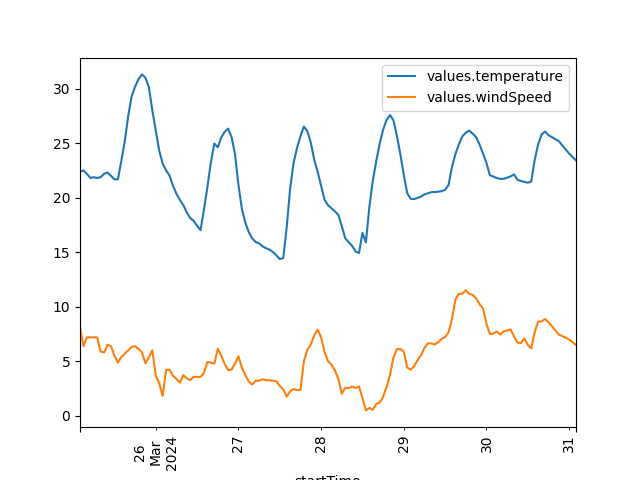

In [2]:
widgets.interact(show_realtime, lat_lon=realtime['lat_lon'])
widgets.interact(show_timeline, lat_lon=realtime['lat_lon'])